0.000256818879432


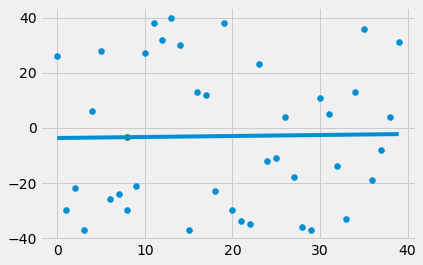

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

# xs = np.array([1,2,3,4,5,6],dtype=np.float64)
# ys = np.array([3,5,2,6,7,9],dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
            y = val + random.randrange(-variance, variance)
            ys.append(y)
            if correlation and correlation == 'pos':
                val+=step
            elif correlation and correlation == 'neg':
                val-=step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs)*mean(ys) ) - mean(xs*ys))/
       ((mean(xs)**2) - mean(xs*xs)) )
    b = mean(ys) - m*mean(xs)
    return m,b

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coeff_of_deter(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

xs,ys = create_dataset(40,40,2,correlation=False)

m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]


predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coeff_of_deter(ys, regression_line)
print(r_squared)
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color = 'g')
plt.plot(xs, regression_line)
plt.show()

In [ ]:
import numpy as np
from sklearn import preprocessing, cross_validation,neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)

x = np.array(df.drop(['class'],1))
y = np.array(df['class'])
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

accuracy = clf.score(x_test,y_test)
# print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures ), -1)

prediction = clf.predict(example_measures)
print(prediction)